In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
# Version check
import keras
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns


print('NumPy version           : ', np.__version__)
print('Keras version           : ', keras.__version__)
print('With tensorflow version : ', tf.__version__)

NumPy version           :  1.16.3
Keras version           :  2.2.4
With tensorflow version :  1.12.0


In [3]:
# Function to load data

def load_dataset():
    
    # use h5py module and specify file path and mode (read) 
    all_train_data = h5py.File("../../data/train_happy.h5", "r")
    all_test_data = h5py.File('../../data/test_happy.h5', "r")
    
    
    # Collect all train and test data from file as numpy arrays
    x_train = np.array(all_train_data["train_set_x"][:]) 
    y_train = np.array(all_train_data["train_set_y"][:]) 

    x_test = np.array(all_test_data["test_set_x"][:])
    y_test = np.array(all_test_data["test_set_y"][:]) 
    

    # Reshape data
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))

    
    return x_train, y_train, x_test, y_test

In [4]:
# Load the data
X_train, Y_train, X_test, Y_test = load_dataset()

In [5]:
print ('Image dimensions : ', X_train.shape[1:])
print ('Training tensor dimension : ', X_train.shape)
print ('Test tensor dimension : ', X_test.shape)
print ()
print ('Number of examples in training tensor : ', X_train.shape[0])
print ('Number of examples in test tensor : ', X_test.shape[0])
print ()
print ('Traning labels dimension : ', Y_train.shape)
print ('Test labels dimension : ', Y_test.shape)

Image dimensions :  (64, 64, 3)
Training tensor dimension :  (600, 64, 64, 3)
Test tensor dimension :  (150, 64, 64, 3)

Number of examples in training tensor :  600
Number of examples in test tensor :  150

Traning labels dimension :  (1, 600)
Test labels dimension :  (1, 150)


y = 0


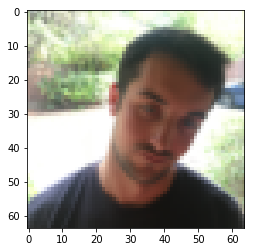

In [6]:
# Plot out a single image

plt.imshow(X_train[0])

# Print label for image (smiling = 1, frowning = 0)
print ("y = " + str(np.squeeze(Y_train[:, 0])))

In [7]:
# Normalize pixels using max channel value, 255

X_train = X_train/255.
X_test = X_test/255.

# Transpose labels
Y_train = Y_train.T
Y_test = Y_test.T

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [8]:
# convert to float 32 ndarrays (preferred by a nn)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')

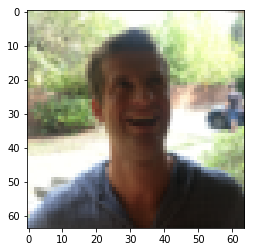

In [9]:
plt.imshow(X_train[3])

Batch normalization place dilemma<br>https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

In [10]:
# Build convolutional neural net

model = Sequential()

#First Convolutional layer 
model.add(Conv2D(16,(5,5), padding = 'same', activation = 'relu', input_shape = (64,64,3)))
model.add(BatchNormalization())
# output still 64 because of padding = same

#First Pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

#Second Convolutional layer 
model.add(Conv2D(32, (5,5), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())

#Second Pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))

#Dropout layer
model.add(Dropout(0.1))

#Flattening layer
model.add(Flatten())

#First densely connected layer
model.add(Dense(128, activation = 'relu'))

#Final output layer
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
# Compile model

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [12]:
# Visualize model layout

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        1216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [13]:
# Initialize early stopping callback to monitor validation loss and terminate training 

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss')

In [14]:
# Initiate training session

model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                             epochs=20, 
                             batch_size=50,
                             callbacks=[early_stopping])

Train on 600 samples, validate on 150 samples
Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 1.4800 - acc: 0.6567 - val_loss: 0.3646 - val_acc: 0.8133
Epoch 2/20
600/600 [==============================] - 0s 209us/step - loss: 0.3012 - acc: 0.8717 - val_loss: 0.2672 - val_acc: 0.8733
Epoch 3/20
600/600 [==============================] - 0s 207us/step - loss: 0.2240 - acc: 0.9133 - val_loss: 0.2600 - val_acc: 0.8867
Epoch 4/20
600/600 [==============================] - 0s 225us/step - loss: 0.1725 - acc: 0.9267 - val_loss: 0.1708 - val_acc: 0.9267
Epoch 5/20
600/600 [==============================] - 0s 222us/step - loss: 0.0996 - acc: 0.9667 - val_loss: 0.1996 - val_acc: 0.9067


In [15]:
# Predict the test set results

Y_pred = model.predict_classes(X_test)

In [16]:
# Assess test accuracy, precision and recall score using sklearn.metrics

print ("Test accuracy: %s" %accuracy_score(Y_test, Y_pred))
print ("Precision: %s"  %precision_score(Y_test, Y_pred))
print ("Recall: %s" %recall_score(Y_test, Y_pred))
print ("F1 score: %s"  %f1_score(Y_test, Y_pred))

Test accuracy: 0.9066666666666666
Precision: 0.972972972972973
Recall: 0.8571428571428571
F1 score: 0.9113924050632912


In [17]:
model.save('./smile_detector.h5py')
model = keras.models.load_model('./smile_detector.h5py')

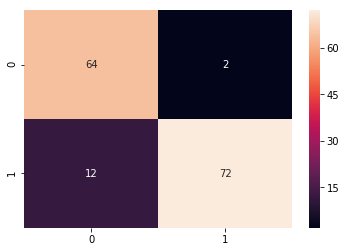

In [18]:
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)

## Looking at intermadiate layers

In [22]:
Y_test[8]

array([1.], dtype=float32)

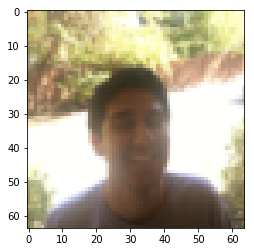

In [23]:
plt.imshow(X_test[8])

In [24]:
# input image to be feed to the model
img_tensor = np.expand_dims(X_test[8], axis=0)

In [25]:
img_tensor /= 255.

In [26]:
from keras import models
# functional model, allows to see intermaediate results
# from 8th layer onwards they are just Flatten and FC, not interesting
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

# eache layer output represents the activations of the multiple filters used
print("number of layers: ", len(activations))
print("Datatype:", type(activations[0]))
print("1st layer output shape:", activations[0].shape)
print("4th layer output shape:", activations[3].shape)
print("8th layer output shape:", activations[7].shape)

number of layers:  8
Datatype: <class 'numpy.ndarray'>
1st layer output shape: (1, 64, 64, 16)
4th layer output shape: (1, 32, 32, 16)
8th layer output shape: (1, 16, 16, 32)


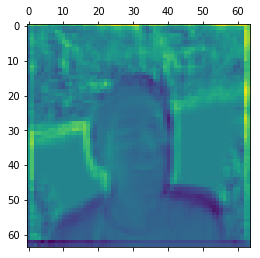

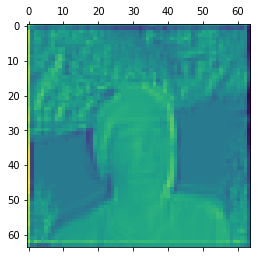

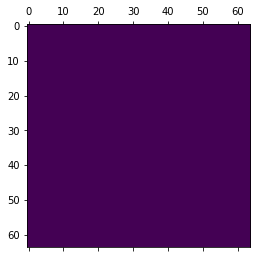

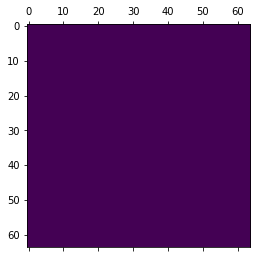

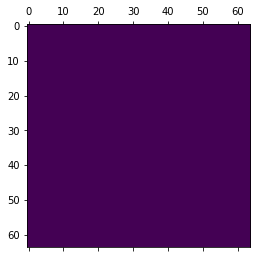

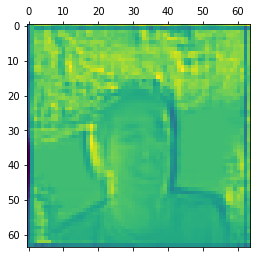

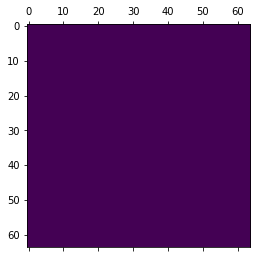

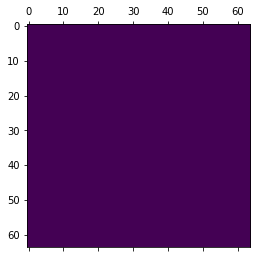

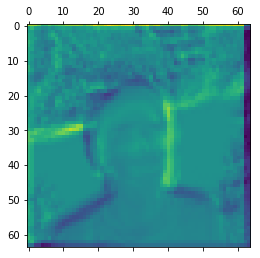

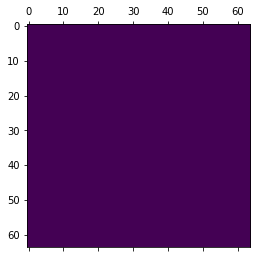

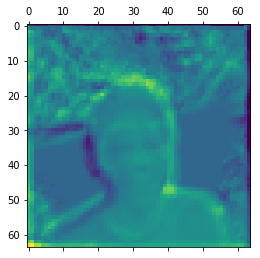

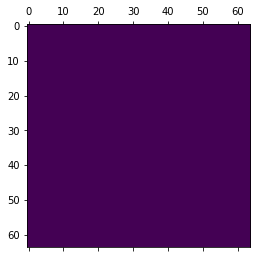

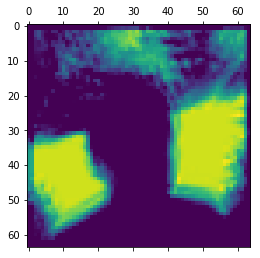

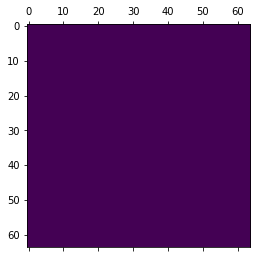

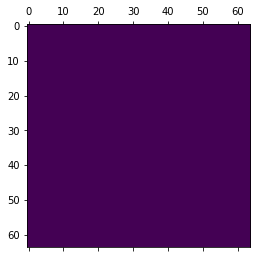

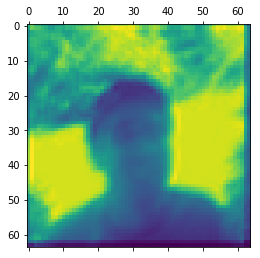

In [27]:
# Plot out activation maps from first layer
# when a map is blank it means that the input image did not have the patterns
# corresponding to the ones encoded by the filters

for i in range(16):
    plt.matshow(activations[0][0, :, :, i], cmap='viridis')

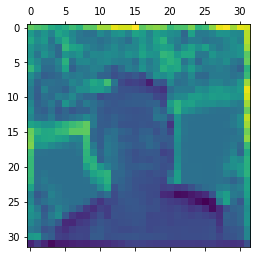

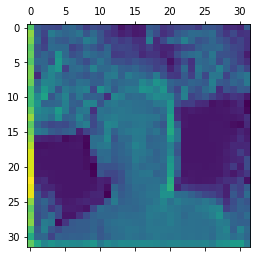

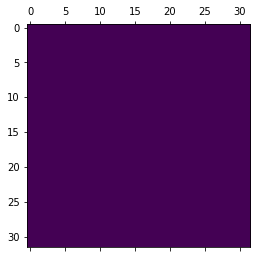

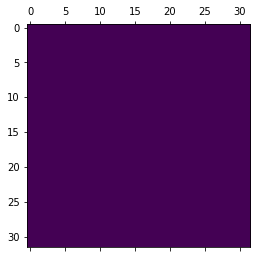

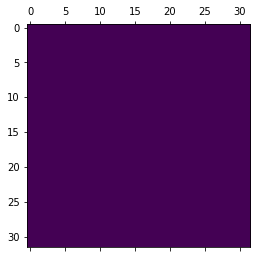

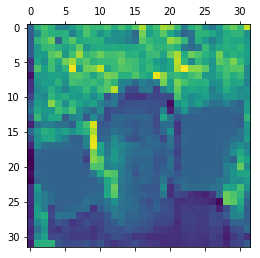

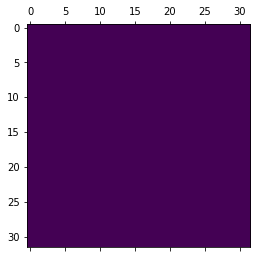

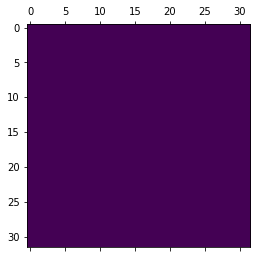

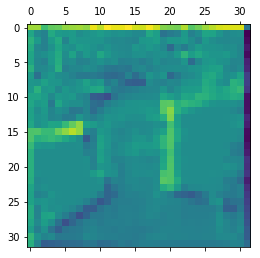

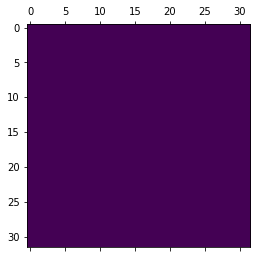

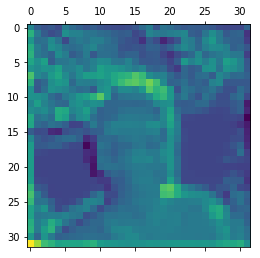

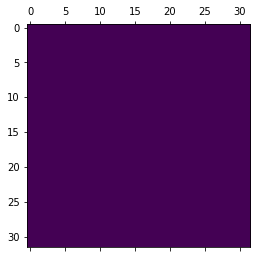

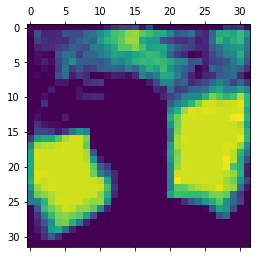

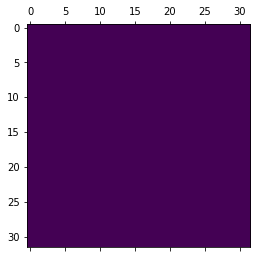

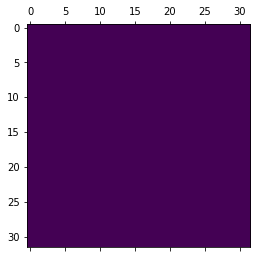

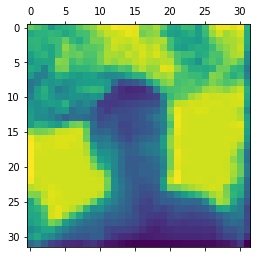

In [36]:
# Plot out activation maps from 3rd layer

for i in range(16):
    plt.matshow(activations[2][0, :, :, i], cmap='viridis')